<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/CGAOptimizationProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución de un problema de optimización a través de un algoritmo genético

**Enunciado del problema**

La	siguiente	gráfica	corresponde	al	distribución	de	una	carpintería	local	que	se
encarga	el	proceso	de	elaboración	de	una	silla.

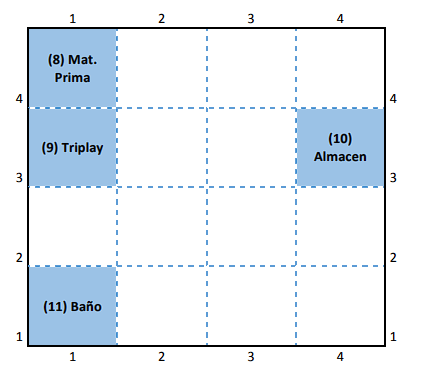

El	problema	es	que	la	carpintería	no	sabe	donde	ubicar	las	distintas	maquinas	de
trabajo	en	el	espacio	descrito.	La	maquinaria	para	realizar	el	proceso	de
elaboración	de	la	silla	es	el	siguiente

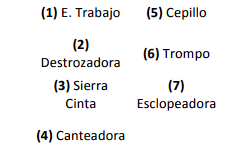

Cada	maquinaria	puede	ser	ubicada	en	los	espacios	de	2	x	2	y	en	los	espacios	en
blanco	descritos	en	la	grafica	anterior.		Los	espacios	descritos	en	color	azul	son
espacios	fijos	y	no	pueden	moverse	de	su	lugar

Y	el	recorrido	para	realizar	la	tarea	es	el	siguiente:

* 1 al 8
* 8 al 1
* 1 al 4
* 4 al 5
* 5 al 3
* 3 al 4
* 4 al 3
* 3 al 1
* 1 al 9
* 9 al 1
* 1 al 3
* 3 al 1
* 1 al 10

Encuentra	la	configuración	de	la	carpintería	que	minimice	el	recorrido	del
personal

# Setup del notebook

Bloque de código para importar los módulos necesarios

In [144]:
 pip install deap

In [145]:
from deap import base, creator, tools, algorithms

import numpy as np
import matplotlib.pyplot as plt

import math
import random

# Configuración de la evolución

A continuación se define la función de aptitud



In [146]:
class Estacion:
  def __init__(self, id: int, nombre: str, x: int, y: int) -> None:
    self.id = id
    self.nombre = nombre
    self.x = x
    self.y = y

  def __str__(self) -> str:
    return '{} x: {}, y: {}'.format(self.nombre, self.x, self.y)

estaciones_nombres = {
   1: 'E. Trabajo',
   2: 'Destrozadora',
   3: 'Sierra cinta',
   4: 'Canteadora',
   5: 'Cepillo',
   6: 'Trompo',
   7: 'Esclopeadora',
}

estaciones_iniciales = {
    8: Estacion(8, 'Mat.Prima', 1, 4),
    9: Estacion(9, 'Triplay', 1, 3),
    10: Estacion(10, 'Almacen', 4, 3),
    11: Estacion(11, 'Baño', 1, 1),
}

posiciones_ocupadas = {
    '1,1': True,
    '1,3': True,
    '1,4': True,
    '4,3': True,
}

fenotipo = {
    0: (1, 2),
    1: (2, 1),
    2: (2, 2),
    3: (2, 3),
    4: (2, 4),
    5: (3, 1),
    6: (3, 2),
    7: (3, 3),
    8: (3, 4),
    9: (4, 1),
    10: (4, 2),
    11: (4, 2),
}

genes = 7

ruta = [1, 8, 1, 4, 5, 3, 4, 3, 1, 9, 1, 3, 1, 10]

In [147]:
def calcular_distancia(a: Estacion, b: Estacion) -> int:
  return math.sqrt(math.pow(b.x - a.x, 2) + math.pow(b.y - a.y, 2))

In [148]:
def ind_to_estaciones(ind: list[int]) -> list[Estacion]:
  posiciones = [fenotipo[gen] for gen in ind]
  estaciones = estaciones_iniciales.copy()
  for i in range(len(posiciones)):
    x, y = posiciones[i]
    estacion = Estacion(i + 1, estaciones_nombres[i + 1], x, y)
    estaciones[i + 1] = estacion

  return estaciones


def fitness(ind: list[int]):
  estaciones = ind_to_estaciones(ind)
  acc = 0
  for i in range(1, len(ruta)):
    a = ruta[i - 1]
    b = ruta[i]
    estacion_a = estaciones[a]
    estacion_b = estaciones[b]
    acc += calcular_distancia(estacion_a, estacion_b)

  return acc,


# Configuración de los individuos

El individuo estará compuesto por números entre el 0 y el 11 (inclusivo) en el que cada gen representa una de las 11 posibles posiciones que puede tomar la estación en la posición i del cromosoma

In [149]:
def crear_individuo():
  ind = list(range(len(fenotipo)))
  random.shuffle(ind)
  return ind[0: genes]

Se define una operación de cruza personalizada que asegure que no hay repeticiones en los genes del cromosoma del individup

In [172]:
def cruza(a, b):
    base = []
    for (a_gen, b_gen) in zip(a, b):
      if a_gen == b_gen:
        base.append(a_gen)
        continue

      base.append(None)

    offspring = [toolbox.clone(ind) for ind in (a, b)]
    for child in offspring:
      for (index, gen) in enumerate(base):
        if gen:
          child[index] = gen
          continue

        selection = None
        while selection is None or selection in child:
          selection = random.randint(0, len(fenotipo) - 1)

        child[index] = selection
        del child.fitness.values

    return offspring

In [188]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, crear_individuo)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", cruza)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=5)

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [174]:
ind = toolbox.individual()
ind

[0, 9, 11, 3, 7, 10, 4]

# Evolución

In [189]:
random.seed(64)
n_gen = 50
initial_pop = 100

pop = toolbox.population(n=initial_pop)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=n_gen, halloffame=hof, verbose=True, stats=stats)

ganador = tools.selBest(pop, k=1)[0]

gen	nevals	avg    
0  	100   	26.8809
1  	54    	23.5938
2  	63    	22.0833
3  	46    	20.0589
4  	49    	18.6298
5  	65    	17.06  
6  	64    	17.1003
7  	43    	17.2685
8  	62    	17.5336
9  	67    	18.0699
10 	45    	16.9775
11 	52    	17.2668
12 	54    	16.9799
13 	57    	17.8323
14 	54    	17.616 
15 	52    	16.6395
16 	62    	16.7998
17 	47    	16.4528
18 	56    	16.8774
19 	53    	16.197 
20 	51    	16.3712
21 	57    	16.1722
22 	51    	15.9972
23 	74    	15.9297
24 	53    	16.0708
25 	62    	15.7652
26 	48    	15.7475
27 	52    	15.9139
28 	65    	16.1099
29 	63    	15.8717
30 	55    	15.6899
31 	58    	15.8057
32 	58    	15.8167
33 	57    	15.8044
34 	58    	15.8892
35 	69    	15.9394
36 	48    	15.7751
37 	55    	15.8656
38 	54    	15.7811
39 	62    	15.9001
40 	49    	15.7604
41 	53    	15.8631
42 	58    	15.7481
43 	60    	15.7934
44 	51    	16.1144
45 	55    	15.8762
46 	60    	15.771 
47 	47    	15.7504
48 	54    	15.9243
49 	72    	15.8081
50 	65    	15.8305


In [190]:
ganador

[3, 7, 2, 6, 1, 11, 0]

# Resultados

A continuación se desplega una gráfica del acomodo optimo según el individuo ganador

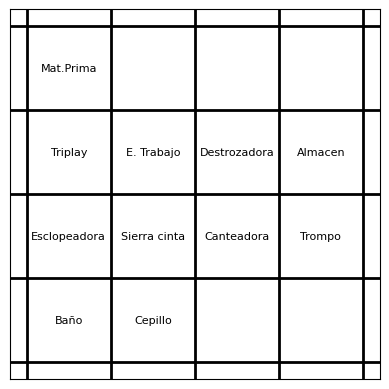

In [191]:
fig, ax = plt.subplots()
for i in range(5):
    ax.axhline(y=i, color='k', linewidth=2)
    ax.axvline(x=i, color='k', linewidth=2)

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')

estaciones = ind_to_estaciones(ganador)
padding = 0.5
for estacion in estaciones.values():
  ax.text(estacion.x - 1 + padding, estacion.y - 1 + padding, estacion.nombre, ha='center', va='center', fontsize=8)

plt.show()